In [1]:
library(outbreaks)
data(influenza_england_1978_school)
Ndata <- 763
sol <- influenza_england_1978_school
sol$time <- as.numeric(sol$date-min(sol$date)) + 2
sol$I <- sol$in_bed
forfit.sol <- sol
noisy_I <- forfit.sol$I/Ndata
iniTime <- 0
iniI <- 1/Ndata

In [2]:
epi.data <- list(
  n_obs = length(noisy_I),
  t0 = iniTime,
  ts = forfit.sol$time,
  y_init = iniI,
  y = noisy_I,
  kb = 1,
  thetab = 1,
  kg = 1,
  thetag = 1,
  as = 9,
  bs = 1
)

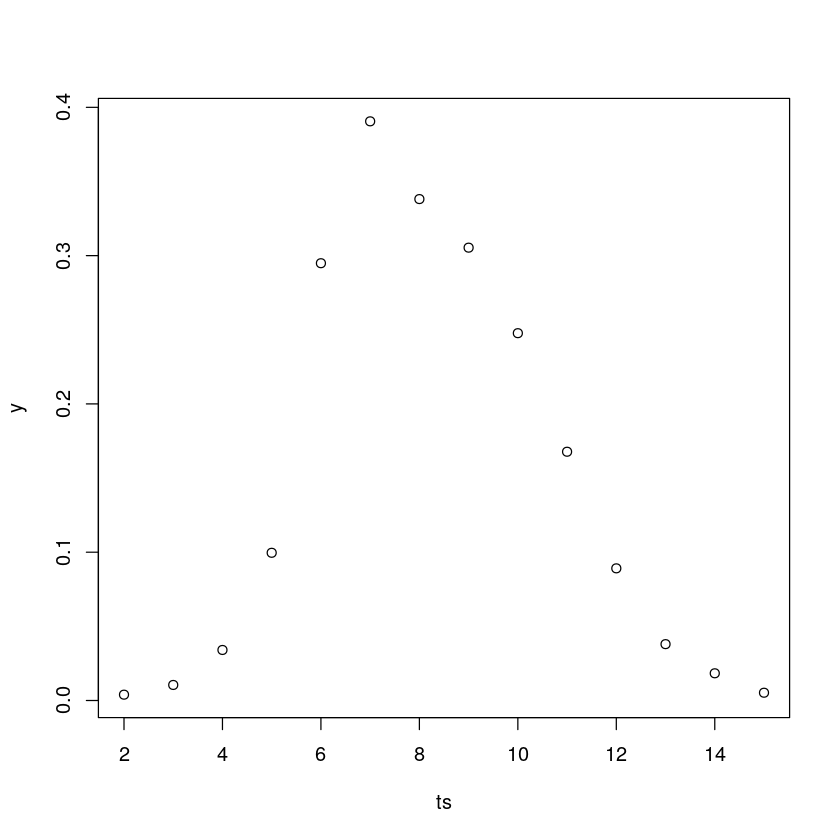

In [3]:
plot(epi.data$ts, epi.data$y, xlab = "ts", ylab = "y")

In [4]:
library(rstan)
rstan_options(auto_write = TRUE)
options(mc.cores = parallel::detectCores())
SIR_code <- stan_model(file = "stan/sir_simple_I_gamma.stan")

Loading required package: StanHeaders
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
rstan (Version 2.19.2, GitRev: 2e1f913d3ca3)
For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)


In [5]:
SIR.map <- optimizing(SIR_code, data = epi.data, hessian = TRUE, verbose = TRUE)

Chain 1: Rejecting initial value:
Chain 1:   Error evaluating the log probability at the initial value.
Chain 1: Exception: lognormal_lpdf: Location parameter[3] is nan, but must be finite!  (in 'model24c74dcdce30_sir_simple_I_gamma' at line 59)

Chain 1: Initial log joint probability = -1360.31
Chain 1:     Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Chain 1:       19       13.6668      0.206855       7.69816       0.389       0.389       27   
Chain 1:     Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Chain 1:       30       23.4735   0.000488319   4.84547e-05           1           1       39   
Chain 1: Optimization terminated normally: 
Chain 1:   Convergence detected: relative gradient magnitude is below tolerance


In [6]:
SIR.map

$par
   r_init[1]    r_init[2]         beta        gamma           S0        sigma 
0.8627700423 0.1417832566 1.8286333834 0.5750633281 0.9997284345 0.9999984621 
          R0   y_hat[1,1]   y_hat[2,1]   y_hat[3,1]   y_hat[4,1]   y_hat[5,1] 
3.1798817523 0.9952883470 0.9834274660 0.9444765310 0.8334761524 0.6113228401 
  y_hat[6,1]   y_hat[7,1]   y_hat[8,1]   y_hat[9,1]  y_hat[10,1]  y_hat[11,1] 
0.3632221377 0.2042698906 0.1266647694 0.0899784891 0.0716474282 0.0618873169 
 y_hat[12,1]  y_hat[13,1]  y_hat[14,1]   y_hat[1,2]   y_hat[2,2]   y_hat[3,2] 
0.0564266138 0.0532649106 0.0513929191 0.0033118623 0.0114025886 0.0376445735 
  y_hat[4,2]   y_hat[5,2]   y_hat[6,2]   y_hat[7,2]   y_hat[8,2]   y_hat[9,2] 
0.1093273504 0.2339998545 0.3183799442 0.2963276392 0.2236464464 0.1527901742 
 y_hat[10,2]  y_hat[11,2]  y_hat[12,2]  y_hat[13,2]  y_hat[14,2]   y_hat[1,3] 
0.0994797908 0.0631864235 0.0395962839 0.0246237009 0.0152442784 0.0013997907 
  y_hat[2,3]   y_hat[3,3]   y_hat[4,3]   y_hat[5,3]   y_hat[6,3]   y_hat[7,3] 
0.0051699455 0.0178788955 0.0571964971 0.1546773054 0.3183979181 0.4994024702 
  y_hat[8,3]   y_hat[9,3]  y_hat[10,3]  y_hat[11,3]  y_hat[12,3]  y_hat[13,3] 
0.6496887842 0.7572313368 0.8288727810 0.8749262597 0.9039771024 0.9221113885 
 y_hat[14,3]        y0[1]        y0[2]        y0[3]     y_rep[1]     y_rep[2] 
0.9333628025 0.9997284345 0.0002715655 0.0000000000 0.0126229329 0.0139039125 
    y_rep[3]     y_rep[4]     y_rep[5]     y_rep[6]     y_rep[7]     y_rep[8] 
0.0398395972 0.0422463504 0.1068350995 1.2650990717 0.2259021162 0.2687166428 
    y_rep[9]    y_rep[10]    y_rep[11]    y_rep[12]    y_rep[13]    y_rep[14] 
0.2310257992 0.3116891355 0.2333029983 0.0914379404 0.0081682792 0.0169165002 

$value
[1] 23.47348

$return_code
[1] 0

$hessian
         r_init.1 r_init.2          beta         gamma            S0
r_init.1        0        0  0.000000e+00  0.000000e+00  0.000000e+00
r_init.2        0        0  0.000000e+00  0.000000e+00  0.000000e+00
beta            0        0 -3.465017e+02  3.607554e+01  3.623515e+01
gamma           0        0  3.607554e+01 -3.255619e+01 -5.537070e+00
S0              0        0  3.623515e+01 -5.537070e+00 -4.615924e+00
sigma           0        0 -5.624751e-06 -1.768960e-06  6.634100e-09
                 sigma
r_init.1  0.000000e+00
r_init.2  0.000000e+00
beta     -5.624751e-06
gamma    -1.768960e-06
S0        6.634100e-09
sigma     2.135071e-05

$theta_tilde
     r_init[1] r_init[2]     beta     gamma        S0     sigma       R0
[1,]   0.86277 0.1417833 1.828633 0.5750633 0.9997284 0.9999985 3.179882
     y_hat[1,1] y_hat[2,1] y_hat[3,1] y_hat[4,1] y_hat[5,1] y_hat[6,1]
[1,]  0.9952883  0.9834275  0.9444765  0.8334762  0.6113228  0.3632221
     y_hat[7,1] y_hat[8,1] y_hat[9,1] y_hat[10,1] y_hat[11,1] y_hat[12,1]
[1,]  0.2042699  0.1266648 0.08997849  0.07164743  0.06188732  0.05642661
     y_hat[13,1] y_hat[14,1]  y_hat[1,2] y_hat[2,2] y_hat[3,2] y_hat[4,2]
[1,]  0.05326491  0.05139292 0.003311862 0.01140259 0.03764457  0.1093274
     y_hat[5,2] y_hat[6,2] y_hat[7,2] y_hat[8,2] y_hat[9,2] y_hat[10,2]
[1,]  0.2339999  0.3183799  0.2963276  0.2236464  0.1527902  0.09947979
     y_hat[11,2] y_hat[12,2] y_hat[13,2] y_hat[14,2]  y_hat[1,3]  y_hat[2,3]
[1,]  0.06318642  0.03959628   0.0246237  0.01524428 0.001399791 0.005169945
     y_hat[3,3] y_hat[4,3] y_hat[5,3] y_hat[6,3] y_hat[7,3] y_hat[8,3]
[1,]  0.0178789  0.0571965  0.1546773  0.3183979  0.4994025  0.6496888
     y_hat[9,3] y_hat[10,3] y_hat[11,3] y_hat[12,3] y_hat[13,3] y_hat[14,3]
[1,]  0.7572313   0.8288728   0.8749263   0.9039771   0.9221114   0.9333628
         y0[1]        y0[2] y0[3]    y_rep[1]   y_rep[2]   y_rep[3]  y_rep[4]
[1,] 0.9997284 0.0002715655     0 0.003433284 0.02269073 0.03337446 0.2360376
      y_rep[5]  y_rep[6] y_rep[7] y_rep[8]   y_rep[9] y_rep[10] y_rep[11]
[1,] 0.1213692 0.2222194 0.200125 0.100733 0.01975814 0.5171537 0.2031062
      y_rep[12]   y_rep[13]  y_rep[14]
[1,] 0.00803325 0.003836634 0


Divergences:


0 of 4000 iterations ended with a divergence.



Tree depth:


0 of 4000 iterations saturated the maximum tree depth of 10.



Energy:


E-BFMI indicated no pathological behavior.


Inference for Stan model: sir_simple_I_gamma.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

      mean se_mean   sd 2.5%  25%  50%  75% 97.5% n_eff Rhat
beta  1.82    0.00 0.12 1.56 1.74 1.82 1.89  2.06  2730    1
gamma 0.60    0.00 0.06 0.48 0.55 0.59 0.63  0.73  3227    1
S0    1.00    0.00 0.00 1.00 1.00 1.00 1.00  1.00  1378    1
R0    3.09    0.01 0.41 2.35 2.81 3.07 3.34  3.96  3010    1
sigma 0.50    0.00 0.12 0.32 0.41 0.48 0.56  0.80  1211    1

Samples were drawn using NUTS(dense_e) at Sat Sep 21 08:17:06 2019.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


Warning message in KernSmooth::bkde2D(x, bandwidth = bandwidth, gridsize = nbin, :
“Binning grid too coarse for current (small) bandwidth: consider increasing 'gridsize'”Warning message in KernSmooth::bkde2D(x, bandwidth = bandwidth, gridsize = nbin, :
“Binning grid too coarse for current (small) bandwidth: consider increasing 'gridsize'”Warning message in KernSmooth::bkde2D(x, bandwidth = bandwidth, gridsize = nbin, :
“Binning grid too coarse for current (small) bandwidth: consider increasing 'gridsize'”Warning message in KernSmooth::bkde2D(x, bandwidth = bandwidth, gridsize = nbin, :
“Binning grid too coarse for current (small) bandwidth: consider increasing 'gridsize'”

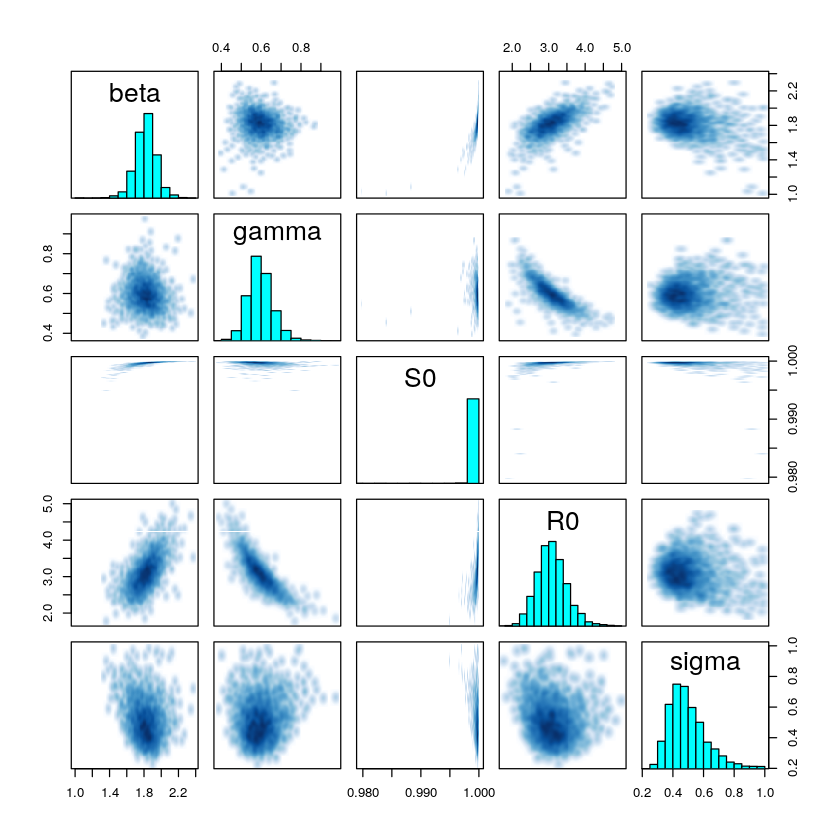

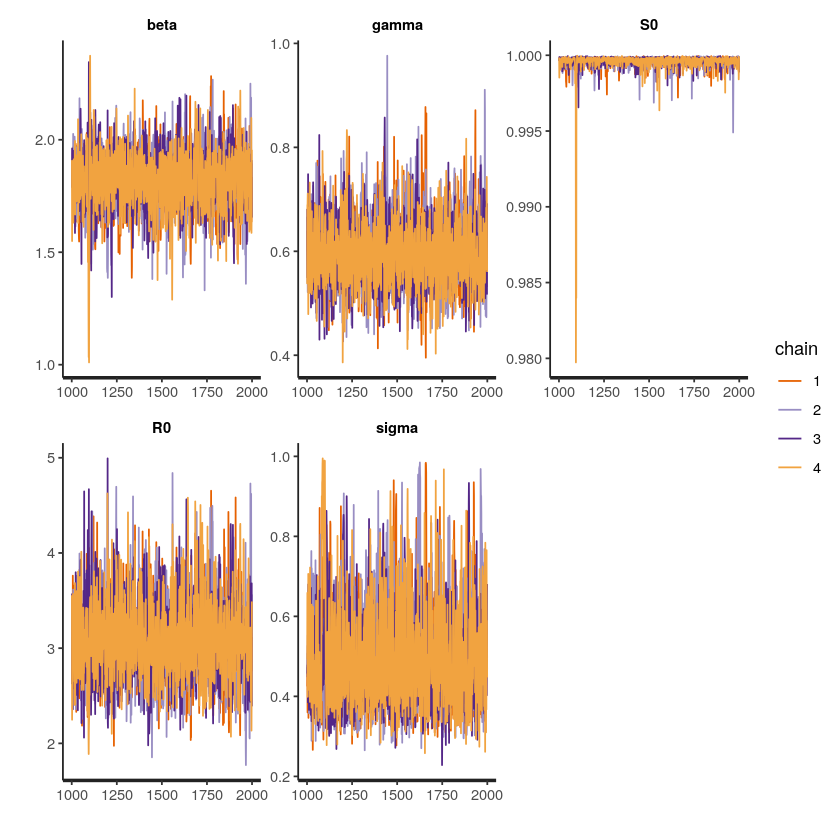

In [7]:
SIR.posterior <- sampling(SIR_code, data = epi.data, chains = 4,
                          control = list(adapt_delta = .95, metric = 'dense_e'))
check_hmc_diagnostics(SIR.posterior)
print(SIR.posterior, pars = c("beta", "gamma", "S0", "R0", "sigma"))
pairs(SIR.posterior, pars = c("beta", "gamma", "S0", "R0", "sigma"))
stan_trace(SIR.posterior, pars = c("beta", "gamma", "S0", "R0", "sigma"))

In [8]:
rnorm_trunc <- function(n, m, s, lb = 0, ub = 1){
  ql <- pnorm(q = lb, mean = m, sd = s)
  qu <- pnorm(q = ub, mean = m, sd = s)
  U <- runif(n = n, min = ql, max = qu)
  return(
    qnorm(U, mean = m, sd = s)
  ) 
}
## 
generate_gamma_trajectory <- function(times,
                                          k_b, theta_b,
                                          k_g, theta_g,
                                          a_s, b_s,
                                          mu_s = .5, sd_s = .5){
  N <- length(times)  
  beta <- rgamma(1, shape = k_b, scale = theta_b)
  gamma <- rgamma(1, shape = k_g, scale = theta_g)
  sigma <- rnorm_trunc(1, m = mu_s, s = sd_s)
  S0 <- rbeta(n = 1, shape1 = a_s, shape2 = b_s)
  ## ODE solving
    require(deSolve)
  sir <- function(time, state, parameters) {
    with(as.list(c(state, parameters)), {
      dS <- -beta * S * I
      dI <-  beta * S * I - gamma * I
      dR <-                 gamma * I
      
      return(list(c(dS, dI, dR)))
    })
  }
  init       <- c(S = S0, I = 1-S0, R = 0.0)
  parameters <- c(beta = beta, gamma = gamma)
  sol <- as.data.frame(ode(y = init, times = times, func = sir, parms = parameters)) 
  ##
  traj <- 
    return(
      rlnorm(N, mean = log(sol$I), sd = sigma) ## sampling model is still log-normal
    )
}

In [9]:
Nrep <- 4000
prior.trajectories <- matrix(NA, ncol = length(epi.data$ts), nrow = Nrep)
for(i in 1:Nrep){
    prior.trajectories[i, ] <- suppressWarnings(
        generate_gamma_trajectory(times = epi.data$ts,
                                   k_b = epi.data$kb, theta_b = epi.data$thetab,
                                   k_g = epi.data$kg, theta_g = epi.data$thetag,
                                   a_s = epi.data$as, b_s = epi.data$bs,
                                   mu_s = 0.5, sd_s = 0.5)
    )
}

Loading required package: deSolve


In [24]:
prior.predicted.incidence <- data.frame(
  time = epi.data$ts,
  lower = apply(prior.trajectories, 2, function(x) as.numeric(quantile(x, probs = .025, na.rm = TRUE))),
  post_mean = colMeans(prior.trajectories, na.rm = TRUE),
  upper = apply(prior.trajectories, 2, function(x) as.numeric(quantile(x, probs = .975, na.rm = TRUE))),
  distribution = "prior"
)

In [25]:
posterior.trajectories <- extract(SIR.posterior, 'y_rep')$y_rep
posterior.predicted.incidence <- data.frame(
  time = epi.data$ts,
  lower = apply(posterior.trajectories, 2, function(x) as.numeric(quantile(x, probs = .025, na.rm = TRUE))),
  post_mean = colMeans(posterior.trajectories, na.rm = TRUE),
  upper = apply(posterior.trajectories, 2, function(x) as.numeric(quantile(x, probs = .975, na.rm = TRUE))),
  distribution = "posterior"
)

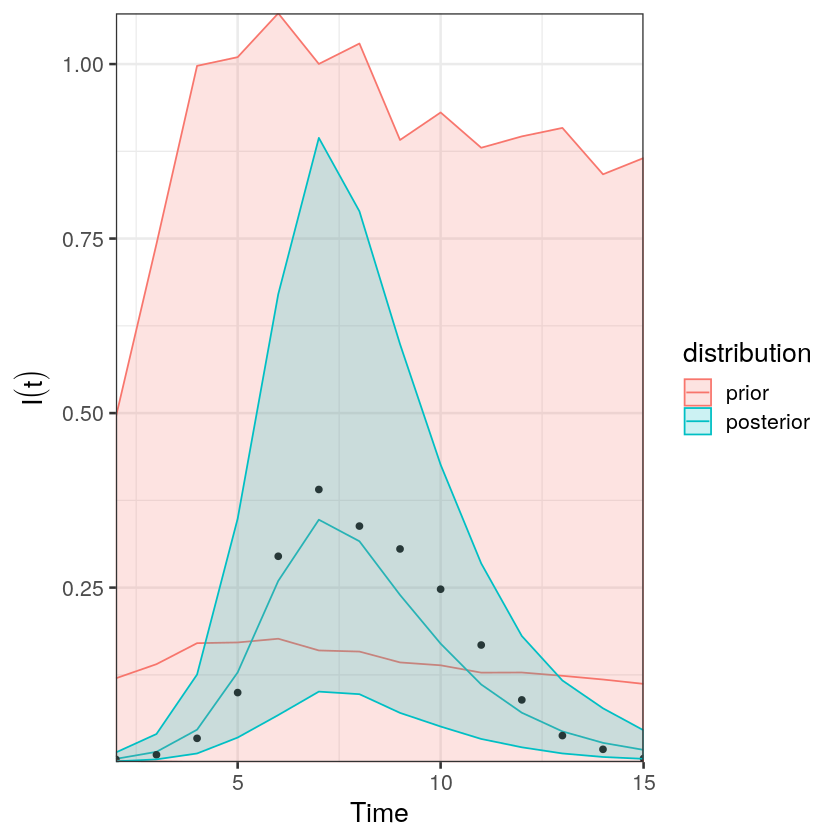

In [26]:
library(ggplot2)

predicted.incidence <- rbind(prior.predicted.incidence, posterior.predicted.incidence)

predictions_SIR <- ggplot(data = predicted.incidence, aes(x = time, y = post_mean,
                                                          colour = distribution, fill = distribution)) +
  geom_line() +
  geom_point(data = data.frame(time = epi.data$ts, I = epi.data$y),
             aes(x = time, y = I), inherit.aes = FALSE) +
  geom_ribbon(aes(ymin = lower, ymax = upper), alpha = .2) +
  scale_x_continuous("Time", expand = c(0, 0)) + 
  scale_y_continuous(expression(I(t)), expand = c(0, 0)) + 
  theme_bw(base_size = 16)

predictions_SIR

In [13]:
source("gamma_ratio.R")

Warning message:
“Removed 397 rows containing non-finite values (stat_density).”Warning message:
“Removed 1 rows containing missing values (geom_path).”

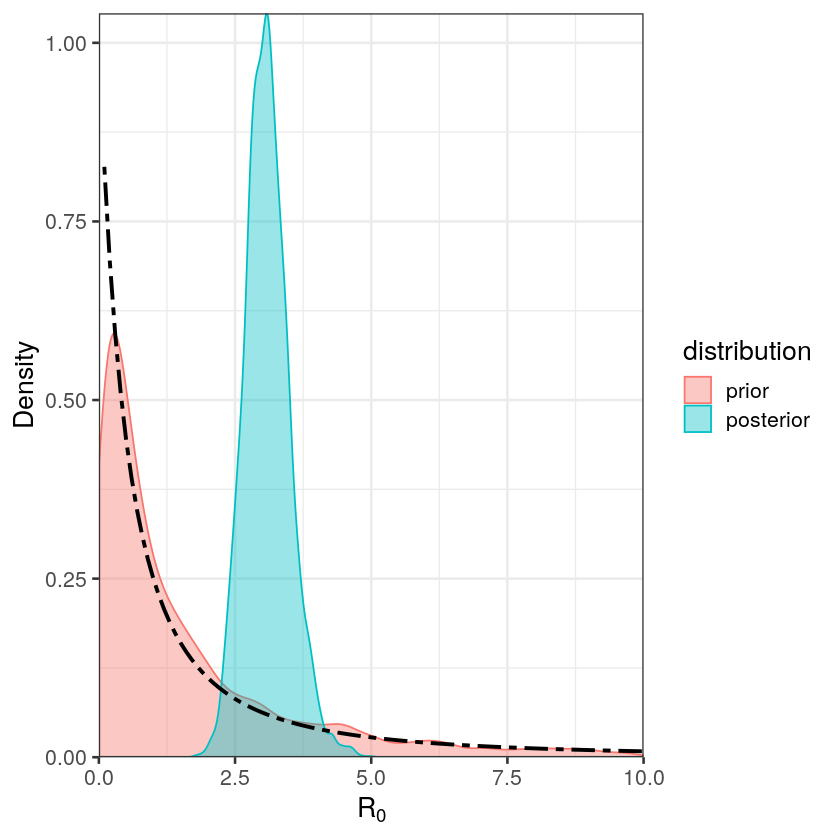

In [14]:
beta.prior.samples <- rgamma(Nrep, shape = epi.data$kb, scale = epi.data$thetab)
gamma.prior.samples <- rgamma(Nrep, shape = epi.data$kg, scale = epi.data$thetag)
R0.prior.samples <- data.frame(R0 = beta.prior.samples/gamma.prior.samples, distribution = "prior")

R0.posterior.samples <- data.frame(R0 = extract(SIR.posterior, 'R0')$R0, distribution = "posterior")

# R0.prior.samples <- data.frame(R0 = rep(NA, N), distribution = "prior")

R0.dt <- rbind(R0.prior.samples,
               R0.posterior.samples)

R0_posterior <- ggplot(data = R0.dt, aes(x = R0, colour = distribution, fill = distribution)) +
  geom_density(alpha = .4) +
#   geom_vline(xintercept = 1.5, linetype = "dotted", size = 1.01) + 
  scale_fill_discrete(drop = FALSE) +
  scale_colour_discrete(drop = FALSE) +
  stat_function(fun = function(x) dgamma.ratio(x,
                                               k1 = epi.data$kb,  t1 = epi.data$thetab,
                                               k2 = epi.data$kg, t2 = epi.data$thetag ,
                                               N = 1),
                inherit.aes = FALSE, linetype = "twodash", size = 1.10) +
  scale_x_continuous(expression(R[0]), expand = c(0, 0), limits = c(0, 10)) + 
  scale_y_continuous("Density", expand = c(0, 0)) + 
  theme_bw(base_size = 16)
R0_posterior

In [15]:
mean(R0.prior.samples$R0 < 5)

[1] 0.8375

In [16]:
mean(R0.posterior.samples$R0 < 5)

[1] 1